# Content

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <ol>
        <li><a href="#ingenieria">Data Engineering</a></li>          
        <li><a href="#architecture">Proposed architecture</a></li>
        <li><a href="#evaluaion">Model evaluation</a></li>
    </ol>
</div>
<br>
<hr> 

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import io 

In [2]:
# Load the dataset 

people = pd.read_csv('../input/predicting-red-hat-business-value/people.csv.zip', sep = ',')
people.head()

# We see much categorical data
# The informacion is anonymized

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [3]:
activity = pd.read_csv('../input/predicting-red-hat-business-value/act_train.csv.zip', sep = ',')
activity.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


# <h1 id="ingenieria">Data Engineering</h1>

In [4]:
# Show the shape

print(people.shape)

# Show the null percent

100*people.isnull().sum()/people.shape[0]

(189118, 41)


people_id    0.0
char_1       0.0
group_1      0.0
char_2       0.0
date         0.0
char_3       0.0
char_4       0.0
char_5       0.0
char_6       0.0
char_7       0.0
char_8       0.0
char_9       0.0
char_10      0.0
char_11      0.0
char_12      0.0
char_13      0.0
char_14      0.0
char_15      0.0
char_16      0.0
char_17      0.0
char_18      0.0
char_19      0.0
char_20      0.0
char_21      0.0
char_22      0.0
char_23      0.0
char_24      0.0
char_25      0.0
char_26      0.0
char_27      0.0
char_28      0.0
char_29      0.0
char_30      0.0
char_31      0.0
char_32      0.0
char_33      0.0
char_34      0.0
char_35      0.0
char_36      0.0
char_37      0.0
char_38      0.0
dtype: float64

In [5]:
# We repet with the other dataset 

print(activity.shape)
100*activity.isnull().sum()/activity.shape[0]

# We gonna delete the columns 90% null and fill 

(2197291, 15)


people_id             0.000000
activity_id           0.000000
date                  0.000000
activity_category     0.000000
char_1               92.826849
char_2               92.826849
char_3               92.826849
char_4               92.826849
char_5               92.826849
char_6               92.826849
char_7               92.826849
char_8               92.826849
char_9               92.826849
char_10               7.173151
outcome               0.000000
dtype: float64

In [6]:
activity.drop(columns=['char_1','char_2','char_3','char_4','char_5','char_6','char_7','char_8','char_9'],inplace=True)

print(activity.shape)

(2197291, 6)


In [7]:
activity.head() 

,people_id,activity_id,date,activity_category,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,type 1,0


In [8]:
# Fill char_10 with the mode

activity['char_10'] = activity['char_10'].fillna(activity["char_10"].mode()[0])

In [9]:
# We data is clean of null dates

100*activity.isnull().sum()/activity.shape[0]

people_id            0.0
activity_id          0.0
date                 0.0
activity_category    0.0
char_10              0.0
outcome              0.0
dtype: float64

In [10]:
# Rename the columns 

activity = activity.rename(columns={"date":"data_activity","char_10":"activity_type"})
activity.head()

,people_id,activity_id,data_activity,activity_category,activity_type,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,type 1,0


In [11]:
# We gonna use merge to join the dataframes

all_data = activity.merge(people,on=["people_id"], how="inner")
all_data.shape

(2197291, 46)

In [12]:
# Show the target  

all_data["outcome"]

0          0
1          0
2          0
3          0
4          0
          ..
2197286    1
2197287    1
2197288    1
2197289    1
2197290    1
Name: outcome, Length: 2197291, dtype: int64

In [13]:
#  Show the distribucion in the target 

100*all_data["outcome"].value_counts()/all_data.shape[0]

0    55.60456
1    44.39544
Name: outcome, dtype: float64

In [14]:
# Show the type of variable 

types = pd.DataFrame(all_data.dtypes)
print("Types of variables: ", types.groupby(0).size())

# We have to convert float to int 

Types of variables:  0
bool      28
int64      2
object    16
dtype: int64


In [15]:
all_data = all_data.replace({False: 0, True: 1})

In [16]:
# Is ready

types = pd.DataFrame(all_data.dtypes)
print("Types of variables replace: ", types.groupby(0).size()) 

Types of variables replace:  0
int64     30
object    16
dtype: int64


In [17]:
# We gonna apply one second replace, As the identifier people_id it consists of a prefix "ppl_" followed by a unique number per user. 
# In this case, it is enough to cut the prefix to transform this variable into a numeric one.

all_data.people_id = all_data.people_id.str.slice(start=4).astype(float).astype(int)

types = pd.DataFrame(all_data.dtypes)
print("Second replace: ",types.groupby(0).size())

Second replace:  0
int64     31
object    15
dtype: int64


In [18]:
all_data[["activity_id", "activity_category", "group_1", "activity_type"]].head(3)

,activity_id,activity_category,group_1,activity_type
0,act2_1734928,type 4,group 17304,type 76
1,act2_2434093,type 2,group 17304,type 1
2,act2_3404049,type 2,group 17304,type 1


In [19]:
# And We have to do the same for those variables 

all_data.activity_id = all_data.activity_id.str.slice(start=5).astype(float).astype(int)
all_data.activity_category = all_data.activity_category.str.slice(start=5).astype(float).astype(int)
all_data.group_1 = all_data.group_1.str.slice(start=6).astype(float).astype(int)
all_data.activity_type = all_data.activity_type.str.slice(start=5).astype(float).astype(int)

types = pd.DataFrame(all_data.dtypes)
print("Thith",types.groupby(0).size()) 

Thith 0
int64     35
object    11
dtype: int64


In [20]:
all_data.head()

,people_id,activity_id,data_activity,activity_category,activity_type,outcome,char_1,group_1,char_2,date,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,100,1734928,2023-08-26,4,76,0,type 2,17304,type 2,2021-06-29,...,0,1,1,0,0,1,1,1,0,36
1,100,2434093,2022-09-27,2,1,0,type 2,17304,type 2,2021-06-29,...,0,1,1,0,0,1,1,1,0,36
2,100,3404049,2022-09-27,2,1,0,type 2,17304,type 2,2021-06-29,...,0,1,1,0,0,1,1,1,0,36
3,100,3651215,2023-08-04,2,1,0,type 2,17304,type 2,2021-06-29,...,0,1,1,0,0,1,1,1,0,36
4,100,4109017,2023-08-26,2,1,0,type 2,17304,type 2,2021-06-29,...,0,1,1,0,0,1,1,1,0,36


In [21]:
# We are going to evaluate the number of different variables

categorics = types.index[types[0] == 'O'].values 
for line in categorics:
    print("The variable "+ line +"contine: ", str(len(all_data[line].unique()))+" distinct values")

The variable data_activitycontine:  411 distinct values
The variable char_1contine:  2 distinct values
The variable char_2contine:  3 distinct values
The variable datecontine:  1196 distinct values
The variable char_3contine:  43 distinct values
The variable char_4contine:  25 distinct values
The variable char_5contine:  9 distinct values
The variable char_6contine:  7 distinct values
The variable char_7contine:  25 distinct values
The variable char_8contine:  8 distinct values
The variable char_9contine:  9 distinct values


In [22]:
all_data.head()

,people_id,activity_id,data_activity,activity_category,activity_type,outcome,char_1,group_1,char_2,date,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,100,1734928,2023-08-26,4,76,0,type 2,17304,type 2,2021-06-29,...,0,1,1,0,0,1,1,1,0,36
1,100,2434093,2022-09-27,2,1,0,type 2,17304,type 2,2021-06-29,...,0,1,1,0,0,1,1,1,0,36
2,100,3404049,2022-09-27,2,1,0,type 2,17304,type 2,2021-06-29,...,0,1,1,0,0,1,1,1,0,36
3,100,3651215,2023-08-04,2,1,0,type 2,17304,type 2,2021-06-29,...,0,1,1,0,0,1,1,1,0,36
4,100,4109017,2023-08-26,2,1,0,type 2,17304,type 2,2021-06-29,...,0,1,1,0,0,1,1,1,0,36


In [23]:
all_data.date

0          2021-06-29
1          2021-06-29
2          2021-06-29
3          2021-06-29
4          2021-06-29
              ...    
2197286    2023-01-06
2197287    2023-01-06
2197288    2023-01-06
2197289    2023-01-06
2197290    2023-01-06
Name: date, Length: 2197291, dtype: object

In [24]:
# We gonna create stationary variables

# convert the object variable to datetime 
all_data["date"] = pd.to_datetime(all_data["date"])

# Create new variables 
all_data["day"] = all_data["date"].dt.day
all_data["day_of_week"] = all_data["date"].dt.weekday
all_data["week"] = all_data["date"].dt.week
all_data["month"] = all_data["date"].dt.month
all_data["trimester"] = all_data["date"].dt.quarter
all_data["year"] = all_data["date"].dt.year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [25]:
all_data.head()

,people_id,activity_id,data_activity,activity_category,activity_type,outcome,char_1,group_1,char_2,date,...,char_35,char_36,char_37,char_38,day,day_of_week,week,month,trimester,year
0,100,1734928,2023-08-26,4,76,0,type 2,17304,type 2,2021-06-29,...,1,1,0,36,29,1,26,6,2,2021
1,100,2434093,2022-09-27,2,1,0,type 2,17304,type 2,2021-06-29,...,1,1,0,36,29,1,26,6,2,2021
2,100,3404049,2022-09-27,2,1,0,type 2,17304,type 2,2021-06-29,...,1,1,0,36,29,1,26,6,2,2021
3,100,3651215,2023-08-04,2,1,0,type 2,17304,type 2,2021-06-29,...,1,1,0,36,29,1,26,6,2,2021
4,100,4109017,2023-08-26,2,1,0,type 2,17304,type 2,2021-06-29,...,1,1,0,36,29,1,26,6,2,2021


In [26]:
# Repet the same but with data_activity

all_data["data_activity"] = pd.to_datetime(all_data["data_activity"])
all_data["activity_day"] = all_data["data_activity"].dt.day
all_data["activity_day_of_week"] = all_data["data_activity"].dt.weekday
all_data["activity_week"] = all_data["data_activity"].dt.week
all_data["activity_month"] = all_data["data_activity"].dt.month
all_data["activity_trimester"] = all_data["data_activity"].dt.quarter
all_data["activity_year"] = all_data["data_activity"].dt.year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [27]:
#Delete the original date columns

del(all_data["date"])
del(all_data["data_activity"])

types = pd.DataFrame(all_data.dtypes)
print("Types of variables later of 4to remplace",types.groupby(0).size())

Types of variables later of 4to remplace 0
int64     47
object     9
dtype: int64


In [28]:
all_data.head()

,people_id,activity_id,activity_category,activity_type,outcome,char_1,group_1,char_2,char_3,char_4,...,week,month,trimester,year,activity_day,activity_day_of_week,activity_week,activity_month,activity_trimester,activity_year
0,100,1734928,4,76,0,type 2,17304,type 2,type 5,type 5,...,26,6,2,2021,26,5,34,8,3,2023
1,100,2434093,2,1,0,type 2,17304,type 2,type 5,type 5,...,26,6,2,2021,27,1,39,9,3,2022
2,100,3404049,2,1,0,type 2,17304,type 2,type 5,type 5,...,26,6,2,2021,27,1,39,9,3,2022
3,100,3651215,2,1,0,type 2,17304,type 2,type 5,type 5,...,26,6,2,2021,4,4,31,8,3,2023
4,100,4109017,2,1,0,type 2,17304,type 2,type 5,type 5,...,26,6,2,2021,26,5,34,8,3,2023


In [29]:
# We are going to evaluate the number of different variables again 

categorics = types.index[types[0] == 'O'].values 
for line in categorics:
    print("The variable "+ line +"contine: ", str(len(all_data[line].unique()))+" distinct values")

The variable char_1contine:  2 distinct values
The variable char_2contine:  3 distinct values
The variable char_3contine:  43 distinct values
The variable char_4contine:  25 distinct values
The variable char_5contine:  9 distinct values
The variable char_6contine:  7 distinct values
The variable char_7contine:  25 distinct values
The variable char_8contine:  8 distinct values
The variable char_9contine:  9 distinct values


In [30]:
# We gonna use one hot encoder for the rest of variables 

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Define dataframe's function and the column to return a dataframe later OHE
def crea_OneHotEncoding(df, column):
  le = LabelEncoder()
  le_ajustado=le.fit_transform(df[column]).reshape(-1,1)
  encoder = OneHotEncoder(sparse=False)
  column = [column+ "_"+ str(i) for i in le.classes_]
  data = encoder.fit_transform(le_ajustado)
  return(pd.DataFrame(data,columns =column))

In [31]:
numeric_columns = list(set(types.index[types[0] =="int64"].values) - set(["outcome"]))
all_data_finish = all_data[numeric_columns]
objetive = all_data["outcome"]

categories = types.index[types[0] == 'O'].values
for column in categories:
  df = crea_OneHotEncoding(all_data,column)
  all_data_finish = pd.concat([all_data_finish,df],axis=1)
  print("Column ",column, " tranform!")

print("Finish size:",all_data_finish.shape)

Column  char_1  tranform!
Column  char_2  tranform!
Column  char_3  tranform!
Column  char_4  tranform!
Column  char_5  tranform!
Column  char_6  tranform!
Column  char_7  tranform!
Column  char_8  tranform!
Column  char_9  tranform!
Finish size: (2197291, 177)


In [32]:
from sklearn.model_selection import train_test_split

# Separte train set and test set  
x_train, x_test, y_train, y_test = train_test_split(all_data,objetive, test_size=0.2,random_state=2020)

# Create validation set
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.1, random_state=2020)

In [33]:
print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
print("Shape of y_val:",y_val.shape)

Shape of x_train: (1582048, 56)
Shape of x_test: (439459, 56)
Shape of x_val: (175784, 56)
Shape of y_train: (1582048,)
Shape of y_test: (439459,)
Shape of y_val: (175784,)


# <h1 id="architecture">Proposed Architecture</h1>

In [34]:
# We gonna use binary_crossentropy like loss function, sigmoid like wake-up function and the metric for evaluation will be the precision "accuracy"

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

# Create the neuronal network 
model = Sequential()
model.add(Dense(256,input_dim = x_train.shape[1],activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid")) 
model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               14592     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 80,641
Trainable params: 80,641
Non-trainable params: 0
_________________________________________________________________
None


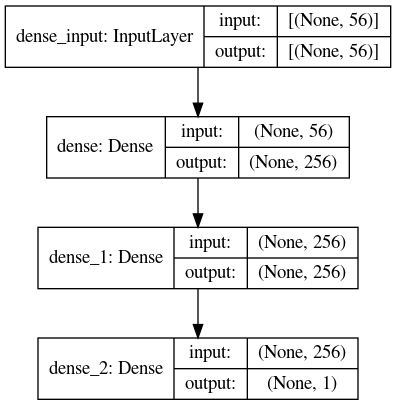

In [35]:
plot_model(model, to_file='model.png',show_shapes=True)

In [36]:
x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')


ValueError: could not convert string to float: 'type 2'

In [37]:
model.fit(x_train,y_train, validation_data = (x_val,y_val),epochs=5, batch_size=128)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).